# Simulating Moving Objects

Note that the first few sections are not run in the Jupyter notebook.  You can rund `asteroids.py` from the command line and view that file directly in a text editor.

## Digging deeper into Euler’s method

In [1]:
t = 0
s = (0,0)
v = (1,0)
a = (0,0.2)

In [2]:
dt = 2
steps = 5

In [3]:
from vectors import add, scale
positions = [s]
for _ in range(0,5):
    t += 2
    s = add(s, scale(dt,v))
    v = add(v, scale(dt,a))
    positions.append(s)

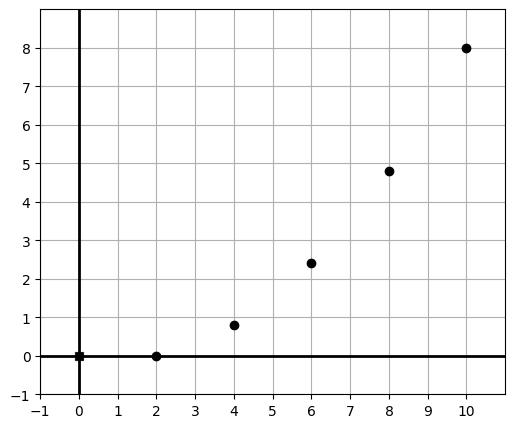

In [4]:
from draw2d import *
draw2d(Points2D(*positions))

### Ex9.2
等加速度運動している物体に対してオイラー法を自動的に実行する関数を作成せよ。
この関数は引数として、初期位置ベクトル、初期速度ベクトル、加速度ベクトルをとる。

In [5]:
# 面倒だったので、答えを見た。
def pairs(lst):
    return list(zip(lst[:-1],lst[1:]))

def eulers_method(s0,v0,a,total_time,step_count):
    positions = [s0]
    s = s0
    v = v0
    dt = total_time/step_count
    for _ in range(0,step_count):
        s = add(s,scale(dt,v))
        v = add(v,scale(dt,a))
        positions.append(s)
    return positions

### Ex9.3
9.4節の計算では、各時間間隔の終わりで速度のy成分を更新していたため、位置のy座標を少な目に近似していた。
各時間間隔の開始時に速度を更新するようにして、時間の経過とともにy位置を多めに近似していることを示せ。

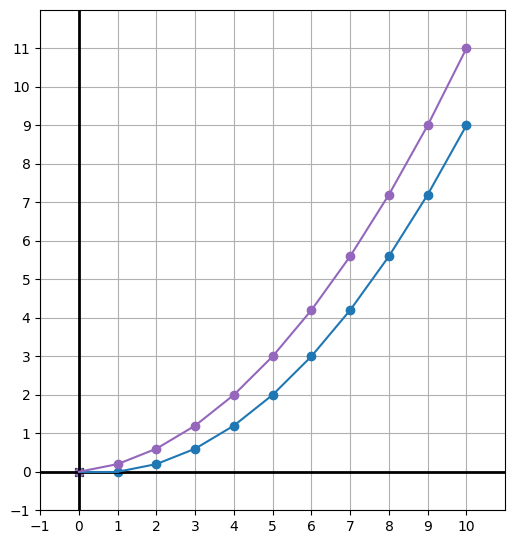

In [27]:
def eulers_method_overapprox(s0,v0,a,total_time,step_count):
    positions = [s0]
    s = s0
    v = v0
    dt = total_time/step_count
    for _ in range(0,step_count):
        v = add(v,scale(dt,a))
        s = add(s,scale(dt,v))
        positions.append(s)
    return positions


approx10 = eulers_method((0,0),(1,0),(0,0.2),10,10)
approx10_overapprox = eulers_method_overapprox((0,0),(1,0),(0,0.2),10,10)

from draw2d import *
from colors import *
draw2d(
    Points2D(*approx10, color=blue),
    *[Segment2D(t,h,color=blue) for (h,t) in pairs(approx10)],
    Points2D(*approx10_overapprox, color=purple),
    *[Segment2D(t,h,color=purple) for (h,t) in pairs(approx10_overapprox)]
    )


### Ex9.4
野球ボールの軌道をオイラー法でシミュレーションせよ。野球ボールが地面に落ちるまでにX方向に進む距離を求めよ。

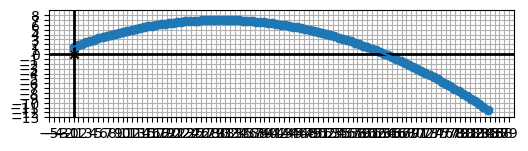

In [46]:
from math import sin, cos, pi
ball_trajectory = eulers_method((0,1.5),(30 * cos(pi / 9), 30 * sin(pi / 9)),(0, -9.81),3,100)

from draw2d import *
from colors import *
draw2d(
    Points2D(*ball_trajectory, color=blue),
    *[Segment2D(t,h,color=blue) for (h,t) in pairs(ball_trajectory)],
    )

In [49]:
for step,vec in enumerate(ball_trajectory):
    if vec[1] <= 0:
        print("step={}, vec={}".format(step,vec))
        break

print("地面に落ちるまでの時間(秒):{}".format((3 / 100) * step))


step=76, vec=(64.27497526175613, -0.26847219652424426)
地面に落ちるまでの時間(秒):2.28


### Ex9.5
前のミニプロジェクトのオイラー法のシミュレーションを初速は同じ30にして、初速の位置を(0,0)に変えて再実行してみよ。初速度の角度をいろいろと変更して試し、ボールが一番遠くまで届く角度を求めよ。

In [72]:
def find_max_x(trajectory_list):
    for vec in trajectory_list:
        if vec[1] < 0:
            return vec[0]
    return 0

s = (0,0)
a = (0, -9.81)
total_time = 5
step_count = 100
angle_deg_range = range(30,70,1)

#
# angle_deg = 30
# angle_rad = (30 / 180) * pi
# v = (30 * cos(angle_rad), 30 * sin(angle_rad))
# ball_trajectory = eulers_method(s,v,a,total_time,step_count)

# draw2d(
#     Points2D(*ball_trajectory, color=blue),
#     *[Segment2D(t,h,color=blue) for (h,t) in pairs(ball_trajectory)],
#     )

for angle_deg in angle_deg_range:
    angle_rad = angle_deg * pi / 180
    v = (30 * cos(angle_rad), 30 * sin(angle_rad))
    ball_trajectory = eulers_method(s,v,a,total_time,step_count)
    # print(ball_trajectory)
    print("角度(°)={}, x={}".format(angle_deg, find_max_x(ball_trajectory)))


角度(°)=30, x=81.83940065762945
角度(°)=31, x=83.573811818456
角度(°)=32, x=83.95676151948626
角度(°)=33, x=85.54439793043332
角度(°)=34, x=87.04894511827943
角度(°)=35, x=88.46842078321122
角度(°)=36, x=88.58736088405676
角度(°)=37, x=89.8464948803203
角度(°)=38, x=91.01524204157627
角度(°)=39, x=90.92607749046546
角度(°)=40, x=91.92533317427743
角度(°)=41, x=92.82927836740105
角度(°)=42, x=92.52153077193557
角度(°)=43, x=93.2475969564444
角度(°)=44, x=92.79483424368607
角度(°)=45, x=93.33809511662417
角度(°)=46, x=92.736892456276
角度(°)=47, x=93.09277614853085
角度(°)=48, x=92.34002367752261
角度(°)=49, x=92.50432308766133
角度(°)=50, x=91.59723438033178
角度(°)=51, x=91.56611689775116
角度(°)=52, x=90.50223687287183
角度(°)=53, x=89.36953093807908
角度(°)=54, x=88.16778784387087
角度(°)=55, x=0
角度(°)=56, x=0
角度(°)=57, x=0
角度(°)=58, x=0
角度(°)=59, x=0
角度(°)=60, x=0
角度(°)=61, x=0
角度(°)=62, x=0
角度(°)=63, x=0
角度(°)=64, x=0
角度(°)=65, x=0
角度(°)=66, x=0
角度(°)=67, x=0
角度(°)=68, x=0
角度(°)=69, x=0


### Ex9.6
原点を起点とし、初速(1,2,0)、等加速度(0,-1,1)で3次元空間を移動する物体の10秒後の位置を求めよ。
第3章の描画関数を使って、その起動を3次元でプロットせよ。


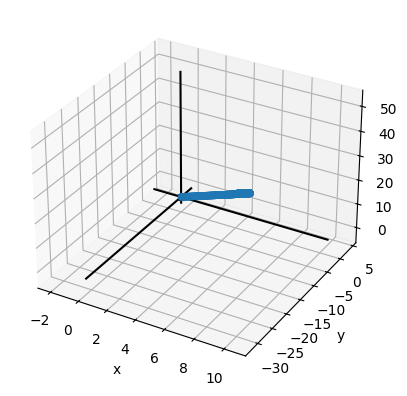

10秒後の位置:(9.999999999999831, -29.949999999999644, 49.94999999999933)


In [81]:
from math import sin, cos, pi

t = 0
s = (0,0,0)
v = (1,2,0)
a = (0,-1,1)

ball_trajectory = eulers_method(s,v,a,10,1000)

from draw3d import *
from colors import *
draw3d(
    Points3D(*ball_trajectory, color=blue),
    )

print("10秒後の位置:{}".format(ball_trajectory[-1]))